In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering as ac
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy as hc

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only consider the first two features.
y = iris.target

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [332.5, 332.5, 360.0, 360.0],
  [315.0, 315.0, 346.25, 346.25],
  [300.0, 300.0, 330.625, 330.625],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [455.0, 455.0, 465.0, 465.0],
  [445.0, 445.0, 460.0, 460.0],
  [435.0, 435.0, 452.5, 452.5],
  [425.0, 425.0, 443.75, 443.75],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [515.0, 

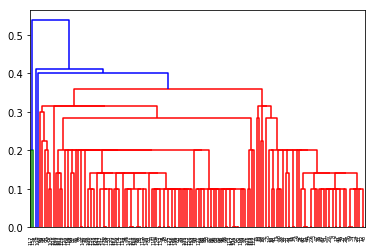

In [2]:
#Unfortunately, we need to play around with different packages here. Only scipy has a functioning dendrograg
#however, its cut_tree function doesn't seem to work

#Scipy works for clustering but has no built in dendrogram function.


hCluster = hc.linkage(X)
hc.dendrogram(hCluster)

We can now cut the tree anywhere we'd like. However, the dendrogram seems to recommend we split it into four clusters.

In [3]:
hCluster = ac(n_clusters=3).fit(X)

In [4]:
assignArray = hCluster.fit_predict(X)

Let's see what this looks like

In [5]:
#Create an assignment array with the same color mapping for easy visualization
#This permutation was done by hand but you could also write a simple algorithm to compute the permutation which minimizes
#differences in classification

assignments = []
for index in assignArray:
    if index == 0:
        assignments.append("grey")
    elif index == 1:
        assignments.append("red")
    elif index == 2:
        assignments.append("orange")
    else:
        print("Class out of bounds")

Text(0, 0.5, 'Sepal width')

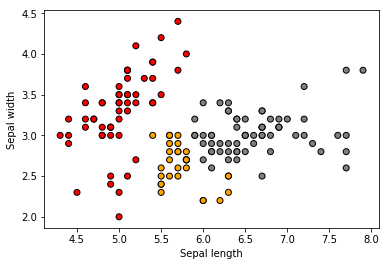

In [6]:
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=assignments,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Let's compare our results to K-Means

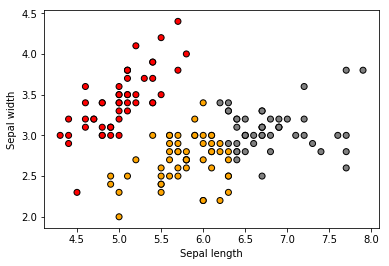

Similar but different. We see that hierarchical clustering is giving more datapoints to the red and grey clusters, shrinking the orange one in size. Let's see which algorithm is more accurate on out of sample misclassification.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)
hCluster = ac(n_clusters=3).fit(X_train)

kmeansPredict = kmeans.predict(X_train)
hClusterPredict = hCluster.fit_predict(X_train)

print(kmeansPredict)
print(hClusterPredict)
print(y_train)

[1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 2 0 1 0 2 0 1 0 0 0 2 1 2 1 1 0 2 2 0 2 0 2
 2 0 0 0 0 0 2 2 0 1 0 0 0 0 0 2 1 1 2 0 1 1 2 1 0 0 1 0 2 0 1 2 2 2 2 1 1
 2 2 1 2 1 0 2 1 1 2 1 1 1 0 2 2 1 1 1 0 2 1 1 2 1 2 0 2 2 1 0 1 2 1 1 2 1
 2 0 0 0 2 2 0 2 1 0 2 0 1 2 0 0 0 1 1 1 2 0 2 1]
[1 0 2 1 1 2 2 1 1 0 1 1 0 2 1 0 2 1 0 0 2 1 2 0 2 0 1 0 1 1 2 0 0 0 0 2 0
 0 2 0 0 2 0 0 0 0 1 2 2 2 2 0 0 1 1 0 2 1 1 0 1 0 2 1 0 0 2 1 0 0 0 0 1 1
 0 0 2 0 1 2 0 1 1 0 1 1 1 2 0 0 1 1 1 2 0 1 1 0 1 0 2 0 0 1 0 1 0 1 1 0 1
 0 2 2 2 0 0 0 0 1 2 0 2 1 0 2 0 0 1 1 1 0 2 0 1]
[0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2
 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0
 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0
 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2 0]


In [47]:
from numpy.linalg import norm
from copy import deepcopy
from numpy.random import uniform
from random import randrange
import numpy as np

def loss(x,y):
    misclass = [x!=y for x,y in zip(x,y)]
    result = sum(misclass)
    return result

def newSol(x,N):
    newSol = deepcopy(x)
    randInt1 = randrange(N)
    randInt2 = randrange(N)
    for i in range(len(newSol)):
        if newSol[i]== randInt1:
            newSol[i] = randInt2
        elif newSol[i]== randInt2:
            newSol[i] = randInt1
    return newSol

In [52]:
#it's not obvious what permutation will minimize the classifications in each case.
#The best method to undertake here would be to implement a version of simulated annealing which would would 
#permute between 0,1, and 2

#Based on matlab code by Joachim Vandekerckhove
def simAnneal(x,y,N):
    #main settings
    Tinit = 1        # initial temp
    minT = 1e-8         # stopping temp
    cool = .8        # annealing schedule
    minF = float('inf')
    max_consec_rejections = 1000
    max_try = 500
    max_success = 300 #typically this is set to 20, but I had to crank it up to 200 to get consistent results
    k = 1                           # boltzmann constant

    # counters etc
    itry = 0
    success = 0
    finished = 0
    consec = 0
    T = Tinit
    parent = x
    initenergy = loss(parent,y)
    oldenergy = initenergy
    total = 0
    
    while not finished:
        itry = itry+1 # just an iteration counter
        current = parent 

        # Stop / decrement T criteria
        if itry >= max_try or success >= max_success:
            if T < minT or consec >= max_consec_rejections:
                finished = 1
                total = total + itry
                break
            else:
                T *= cool # decrease T according to cooling schedule
                total = total + itry
                itry = 1
                success = 1

        newparam = newSol(current,N)
        newenergy = loss(newparam,y)

        if (newenergy < -minF):
            parent = newparam 
            oldenergy = newenergy
            break

        if (oldenergy-newenergy > 1e-6):
            parent = newparam
            oldenergy = newenergy
            success = success+1
            consec = 0
        else:
            if (uniform() < np.exp( (oldenergy-newenergy)/(k*T) )):
                parent = newparam
                oldenergy = newenergy
                success = success+1
            else:
                consec = consec+1

    minimum = parent
    fval = oldenergy
    
    return (minimum, fval)

In [58]:
[kmeansPermuted,numMisclassified] = simAnneal(kmeansPredict,y_train,3)
print(kmeansPermuted)
print(numMisclassified/135)

[0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0 1 1 1 2 0 2 0 0 1 2 2 1 2 1 2
 2 1 1 1 1 1 2 2 1 0 1 1 1 1 1 2 0 0 2 1 0 0 2 0 1 1 0 1 2 1 0 2 2 2 2 0 0
 2 2 0 2 0 1 2 0 0 2 0 0 0 1 2 2 0 0 0 1 2 0 0 2 0 2 1 2 2 0 1 0 2 0 0 2 0
 2 1 1 1 2 2 1 2 0 1 2 1 0 2 1 1 1 0 0 0 2 1 2 0]
0.15555555555555556


In [59]:
[hClusterPermuted,numMisclassified] = simAnneal(hClusterPredict,y_train,3)
print(hClusterPermuted)
print(numMisclassified/135)

[0 2 1 0 0 1 1 0 0 2 0 0 2 1 0 2 1 0 2 2 1 0 1 2 1 2 0 2 0 0 1 2 2 2 2 1 2
 2 1 2 2 1 2 2 2 2 0 1 1 1 1 2 2 0 0 2 1 0 0 2 0 2 1 0 2 2 1 0 2 2 2 2 0 0
 2 2 1 2 0 1 2 0 0 2 0 0 0 1 2 2 0 0 0 1 2 0 0 2 0 2 1 2 2 0 2 0 2 0 0 2 0
 2 1 1 1 2 2 2 2 0 1 2 1 0 2 1 2 2 0 0 0 2 1 2 0]
0.17037037037037037


It looks like hierarchical clustering is slightly less accurate in sample. Although clustering is an unsupervised learning method, we are using labeled data to "train" our permutations. Therefore, in order to objectively evaluate each algorithm's performance, we must evaluate the classification with the same permutation on our test dataset.

In [64]:
testKmeans = kmeans.predict(X_test)
testHcluster = hCluster.fit_predict(X_test)

#Apply permutations (I just hardcoded these)

for i in range(len(X_test)):
    if testKmeans[i] == 1:
        testKmeans[i] = 0
    elif testKmeans[i] == 0:
        testKmeans[i] = 1
    if testHcluster[i] == 1:
        testHcluster[i] = 0
    elif testHcluster[i] == 0:
        testHcluster[i] = 2
    elif testHcluster[i] == 2:
        testHcluster[i] = 1
        
print(loss(testKmeans,y_test))
print(loss(testKmeans,y_test)/15)
print(loss(testHcluster,y_test))
print(loss(testHcluster,y_test)/15)

6
0.4
11
0.7333333333333333


We see that spectral clustering K-means is much more accurate.

Now we don't necessarily need to cut the dendograph to create 3 clusters. We can cut it anywhere we like. Let's see what happens when we consider the case of 2 and 4 clusters.

Text(0, 0.5, 'Sepal width')

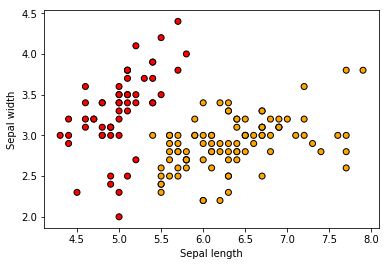

In [66]:
hCluster = ac(n_clusters=2).fit(X)
assignArray = hCluster.fit_predict(X)

#Create an assignment array with the same color mapping for easy visualization
#This permutation was done by hand but you could also write a simple algorithm to compute the permutation which minimizes
#differences in classification

assignments = []
for index in assignArray:
    if index == 0:
        assignments.append("orange")
    elif index == 1:
        assignments.append("red")
    else:
        print("Class out of bounds")
        
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=assignments,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

It looks like the second and third clusters have merged into one, while the first remains mostly unchanged.

Text(0, 0.5, 'Sepal width')

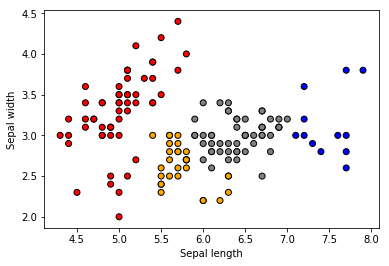

In [69]:
hCluster = ac(n_clusters=4).fit(X)
assignArray = hCluster.fit_predict(X)

#Create an assignment array with the same color mapping for easy visualization
#This permutation was done by hand but you could also write a simple algorithm to compute the permutation which minimizes
#differences in classification

assignments = []
for index in assignArray:
    if index == 0:
        assignments.append("red")
    elif index == 1:
        assignments.append("grey")
    elif index == 2:
        assignments.append("orange")
    elif index == 3:
        assignments.append("blue")
    else:
        print("Class out of bounds")
        
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=assignments,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Again, we see that the first cluster is mostly unchanged. However, the third cluster has split into two. The blue cluster appears to capture the right leaning outliers of the third. What's interesting about the second cluster is that it looks like it can also be split into one portion which lies between the red and grey, and one that lies under the grey. 